# Some Exemples How to use pdfplumber

https://medium.com/@karthickrajm/how-to-extract-table-from-pdf-using-python-pdfplumber-a2010b184431

https://github.com/jsvine/pdfplumber

https://github.com/jsvine/pdfplumber/blob/stable/examples/notebooks/extract-table-ca-warn-report.ipynb

https://stackoverflow.com/questions/66463612/how-to-find-table-grid-lines-in-pdf-files

https://github.com/jsvine/pdfplumber

Test changes in the Jupyter notebook

# 0 - Read Files From Directory and convert them in a List

In [1]:
# import OS
import os
from pathlib import Path

In [2]:
# Read files names from a directory / path 
path = '/Users/rocha/OneDrive/Documentos/Python_Scripts/Convert_PDF/Data'
file_list = []

for x in os.listdir(path):
    if x.endswith(".pdf"):
        file_list.append(x.split('.')[0])

#for x in os.listdir(path):
for file_int in sorted(file_list):
    x = str(file_int) + '.pdf'
    if x.endswith(".pdf"):
        filepath = path + '/' + x 
        filename = Path(filepath).stem + '.pdf'
        
        print(filepath)

/Users/rocha/OneDrive/Documentos/Python_Scripts/Convert_PDF/Data/12JK.pdf
/Users/rocha/OneDrive/Documentos/Python_Scripts/Convert_PDF/Data/2018-04-PartA.pdf
/Users/rocha/OneDrive/Documentos/Python_Scripts/Convert_PDF/Data/2018_Grundstückspreise.pdf
/Users/rocha/OneDrive/Documentos/Python_Scripts/Convert_PDF/Data/2019.pdf
/Users/rocha/OneDrive/Documentos/Python_Scripts/Convert_PDF/Data/A dictionary of Arabic and Islamic proverbs.pdf
/Users/rocha/OneDrive/Documentos/Python_Scripts/Convert_PDF/Data/Combined.pdf
/Users/rocha/OneDrive/Documentos/Python_Scripts/Convert_PDF/Data/FIA Membership Directory.pdf
/Users/rocha/OneDrive/Documentos/Python_Scripts/Convert_PDF/Data/Go Viral 9-5.pdf
/Users/rocha/OneDrive/Documentos/Python_Scripts/Convert_PDF/Data/Instructions and examples for data extraction.pdf
/Users/rocha/OneDrive/Documentos/Python_Scripts/Convert_PDF/Data/Little-Caesars-Complete-FDD-March-31-2023.pdf
/Users/rocha/OneDrive/Documentos/Python_Scripts/Convert_PDF/Data/Little-Caesars-Comp

In [ ]:
import os
'''
    For the given path, get the List of all files in the directory tree 
'''
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles 


    
dirName = '/Users/rocha/OneDrive/Documentos/Python_Scripts/Convert_PDF/Data/Statements';
    
# Get the list of all files in directory tree at given path
listOfFiles = getListOfFiles(dirName)
    
# Print the files
for elem in listOfFiles[0:5]:
    print(elem)
print ("****************")
    
# Get the list of all files in directory tree at given path
#listOfFiles = list()
#for (dirpath, dirnames, filenames) in os.walk(dirName):
#    listOfFiles += [os.path.join(dirpath, file) for file in filenames]

# Print the files    
#for elem in listOfFiles:
#    print(elem)  


In [5]:
import re

# Splitting by multi-characters in String 
# ex 
string = 'License #: W692343 Issue Date: 10/21/2020 Expiration Date: Last Updated: 10/22/2020'

res = re.split('License #|Issue Date|Expiration Date|Last Updated', string)
res

['', ': W692343 ', ': 10/21/2020 ', ': ', ': 10/22/2020']

# 1 - Example of dealing with pdf file

In [7]:
#!pip install pdfplumber

In [3]:
import pdfplumber
print(pdfplumber.__version__)

0.9.0


In [4]:
import pandas as pd
import os 

filepath = '/Users/rocha/OneDrive/Documentos/Python_Scripts/Convert_PDF/Data/2018-04-PartA.pdf'
#path = '/Users/rocha/Downloads/foo.pdf'
pdf = pdfplumber.open(filepath)  
number_of_pages = len(pdf.pages)
print('number_of_pages', number_of_pages)
print('Metadata', pdf.metadata)


number_of_pages 37
Metadata {'Author': 'Admin', 'Creator': 'Microsoft® Word 2010', 'CreationDate': "D:20180515092411+05'30'", 'ModDate': "D:20180515092411+05'30'", 'Producer': 'Microsoft® Word 2010'}


In [5]:
pdfpage = pdf.pages[0]

In [6]:
# Extrat text from pdf. from pag 1
text = pdfpage.extract_text()
text[:1400]

'STATEMENT ON DETAILED BREAK-UP FOR INDUSTRIAL ENTREPRENUERS MEMORANDUM (IEM)\nIN THE MONTH OF MARCH 2018\n(Investment in Rs Crore)\nSl. Company Name Item of Manufacture District Capacity IEM\nNo and Address State Unit No\nand\nDate\n1 SUZLON ENERGY LTD. WIND OPERATED ELELCTRICITY ANANTAPPUR 300 439\nONE EARTH,SADE SATRA GENERATORS (WIND MILLS) AND ANDHRA PRADESH NOS 23\nNALLI,OPP.MAGARPATTA CITY PARTS THEREOF March\nHADAPSAR,PUNE, 2018\nMAHARASHTRA-411028\nPlace(Tehsil) : DADULURU,()\n2 CETC RENEWABLE ENERGY SOLAR CELL CHITTOOR 200 440\nTECHNOLOGY(INDIA) PVT.LTD ANDHRA PRADESH MW 23\nIIND FLR M.C.305 NORTH, March\n2ND STREET,SEC-3SRI CITY, 2018\nTHONDURU VILL,NELLORE,\nANDHRA PRADESH-517646\nPlace(Tehsil) : 250,THESPIA DRIVE,()\n3 VALLHABHA MILK PRODUCTS MILK CHITTOOR 36500000 476\nPVT.LTD. ANDHRA PRADESH LITERS 28\nD.NO.10-11-20,ARUDELPET, March\nOPP.SAI RESIDENCY, 2018\nNARASARAOPET,GUNTUR,\nANDHRA PRADESH-522601\nPlace(Tehsil) : SY.NO.13-4,5,6,(KANIPAKKAM,)\n4 KRISHNA PRABHAS PAPER

In [7]:
#Page Number
print('page number =', pdfpage.page_number)

#Page width
print('page width=', pdfpage.width)

#Page Height
print('page height=', pdfpage.height)

# Lines List coordinates
pdfpage.lines

#Propperties of Firts char from pag x
print('\n', pdfpage.chars[0])

#for i in range(150,300):
#    print(pdfpage.chars[i])

#Firts char from pag x
print('\n', pdfpage.chars[0]['text'])

# Size of Firts char from pag x
print('\n', pdfpage.chars[0]['size'])

# Color of Firts char from pag x
print('\n', pdfpage.chars[0]['non_stroking_color'])

page number = 1
page width= 792
page height= 612

 {'matrix': (1, 0, 0, 1, 80.52, 527.5), 'fontname': 'Helvetica', 'adv': 9.04452, 'upright': True, 'x0': 80.52, 'y0': 524.69308, 'x1': 89.56452, 'y1': 538.25308, 'width': 9.044520000000006, 'height': 13.559999999999945, 'size': 13.559999999999945, 'object_type': 'char', 'page_number': 1, 'text': 'S', 'stroking_color': (0, 0, 1), 'non_stroking_color': (0, 0, 1), 'top': 73.74692000000005, 'bottom': 87.30691999999999, 'doctop': 73.74692000000005}

 S

 13.559999999999945

 (0, 0, 1)


# Words

In [8]:
#Extrair palavras da pagina 1
words = pdfpage.extract_words(y_tolerance=2)
print('Proriedades da Primeira Palavra da pag 1:\n', words[0])
#print('Proriedades da Primeira Palavra da pag 1:\n', words[20:50])
print('\nTexto da Primeira Palavra da pag 1:', words[0]['text'])

Proriedades da Primeira Palavra da pag 1:
 {'text': 'STATEMENT', 'x0': 80.52, 'x1': 162.35459999999998, 'top': 73.74692000000005, 'doctop': 73.74692000000005, 'bottom': 87.30691999999999, 'upright': True, 'direction': 1}

Texto da Primeira Palavra da pag 1: STATEMENT


In [9]:
# Lines List coordinates
pdfpage.lines

[]

In [10]:
img = pdfpage.to_image()

#croppage = pdfpage.crop((0, 100, pdfpage.width, pdfpage.height))
#img = croppage.to_image()

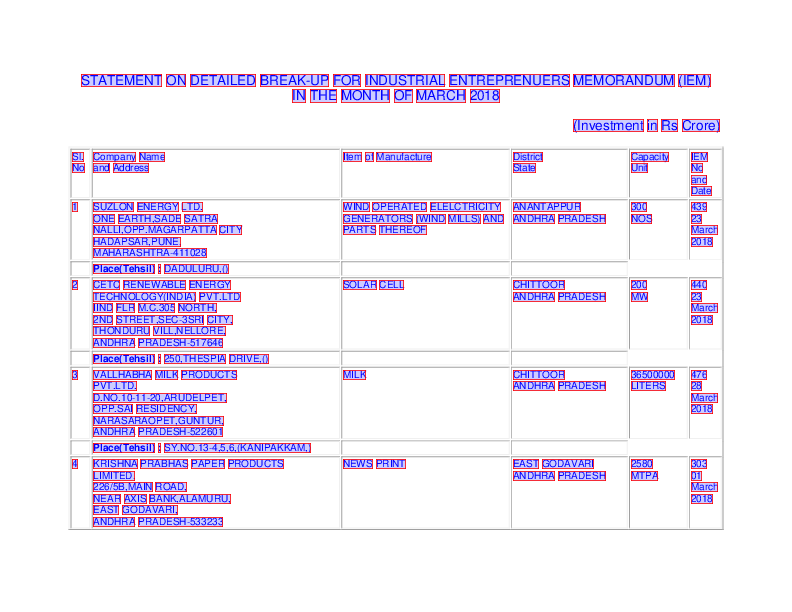

In [11]:
#img
img.draw_rects(pdfpage.extract_words(y_tolerance=1))

In [14]:
# Dr's name discipline name of business, address (suit no., level, street number building if applicable) phone numbers email address

col = ['Name of Undertaking/Address', 'Location', 'Item of Manufacture/', 'Annual No./Capacity', 'Proposed Ack.', 'Date', 'NA/NU/SE', 'TEHSIL']

print(len(col))
col

8


['Name of Undertaking/Address',
 'Location',
 'Item of Manufacture/',
 'Annual No./Capacity',
 'Proposed Ack.',
 'Date',
 'NA/NU/SE',
 'TEHSIL']

In [15]:
words[-1]

{'text': 'GUNTUR,',
 'x0': 118.41069143579998,
 'x1': 152.32012109857678,
 'top': 801.2775245374629,
 'doctop': 801.2775245374629,
 'bottom': 808.932289169263,
 'upright': True,
 'direction': 1}

In [16]:
df_words = pd.DataFrame(words)
df_words[:5]

,text,x0,x1,top,doctop,bottom,upright,direction
0,LIST,129.598424,146.013773,50.521763,50.521763,58.176527,True,1
1,OF,148.440922,158.967990,50.521763,50.521763,58.176527,True,1
2,INDUSTRIAL,161.395139,206.838532,50.521763,50.521763,58.176527,True,1
3,ENTREPRENEURS',209.090211,278.841015,50.521763,50.521763,58.176527,True,1
4,MEMORANDUM,280.927233,337.889281,50.521763,50.521763,58.176527,True,1


In [108]:
df_words['x1'].max()

511.85146163715353

In [17]:
df_words[:1]

,text,x0,x1,top,doctop,bottom,upright,direction
0,LIST,129.598424,146.013773,50.521763,50.521763,58.176527,True,1


In [126]:
header_line = df_words[df_words['text'] == 'Name']['bottom']
#header_line = df_words[:1]['top']
header_line = header_line.values[0]
header_line

66.89399999999989

In [127]:
#https://www.nadsa.org/locator/
#footer_line = df_words[-1:]['bottom']
footer_line = df_words[df_words['text'] == 'pr_address']['top']
footer_line = footer_line.values[0]
footer_line

551.2399999999999

In [68]:
df_words[df_words['text'] == '15000.000']

,text,x0,x1,top,doctop,bottom,upright,direction
121,15000.000,411.058232,446.491548,350.824067,350.824067,358.478832,True,1


In [109]:
#col = ['ORDER Nº', 'PRODUCT DESCRIPTION',  'PRICE PER UNIT (€)*']

def  verticallines(df_words):

    vertical_lines = []

    v = 35
    vertical_lines.append(v)
    
    #v = 46
    #vertical_lines.append(v)
    
    #v = df_words[df_words['text'] == 'Name']['x0']
    #vertical_lines.append(v.values[0]-5) 

    #v = 400 # Page Width
    #vertical_lines.append(v)

    max_witdth = df_words['x1'].max()
    
    v = max_witdth # Page Width
    vertical_lines.append(v)
    

    return(vertical_lines)

In [110]:
vertical_lines = verticallines(df_words)
vertical_lines

[35, 511.85146163715353]

In [25]:
'''
horizontal = df_words[(df_words['x0'] > vertical_lines[0]) & 
                            (df_words['x0'] < vertical_lines[2]) & 
                            (df_words['top'] >= header_line) & 
                            (df_words['bottom'] <= footer_line)]
'''
horizontal = df_words[(df_words['x0'] > vertical_lines[0]) & 
                            (df_words['x0'] < vertical_lines[2])]

#horizontal = df_words[(df_words['top'] >= header_line) & 
#                      (df_words['bottom'] <= footer_line)]

horizontal.head(10)
horizontal[:5]

,text,x0,x1,top,doctop,bottom,upright,direction
0,LIST,129.598424,146.013773,50.521763,50.521763,58.176527,True,1
1,OF,148.440922,158.967990,50.521763,50.521763,58.176527,True,1
2,INDUSTRIAL,161.395139,206.838532,50.521763,50.521763,58.176527,True,1
3,ENTREPRENEURS',209.090211,278.841015,50.521763,50.521763,58.176527,True,1
4,MEMORANDUM,280.927233,337.889281,50.521763,50.521763,58.176527,True,1


In [26]:
horizontal[-5:]

,text,x0,x1,top,doctop,bottom,upright,direction
267,LANE,103.689990,123.478146,791.267448,791.267448,798.922212,True,1
268,2ND,126.065456,140.967516,791.267448,791.267448,798.922212,True,1
269,CROSS,44.807185,71.661277,801.277525,801.277525,808.932289,True,1
270,"BRODIPET,",74.248588,115.812782,801.277525,801.277525,808.932289,True,1
271,"GUNTUR,",118.410691,152.320121,801.277525,801.277525,808.932289,True,1


In [27]:
def horizontallines(horizontal):

    horizontal_lines = []

    for ind in range(len(horizontal)):
        horizontal_lines.append(horizontal.iloc[ind]['top']-1)
        horizontal_lines.append(horizontal.iloc[ind]['bottom']+1)
        
    horizontal_lines = list(set(horizontal_lines))
    horizontal_lines.sort()  
    
    return(horizontal_lines)

In [28]:
horizontal_lines = horizontallines(horizontal)
horizontal_lines

[49.52176257246299,
 59.17652720426304,
 59.53183939866301,
 69.18660403046306,
 79.55199305106305,
 89.2067576828631,
 89.56206987726307,
 99.21683450906312,
 99.57214670346298,
 109.22691133526303,
 109.582223529663,
 119.23698816146305,
 119.59230035586302,
 129.24706498766307,
 129.60237718206304,
 139.2571418138631,
 139.61245400826294,
 149.267218640063,
 149.62253083446296,
 159.277295466263,
 159.63260766066298,
 169.28737229246303,
 169.642684486863,
 179.29744911866305,
 179.65276131306302,
 189.30752594486307,
 189.66283813926304,
 199.3176027710631,
 209.68299179166297,
 219.33775642346302,
 219.693068617863,
 229.34783324966304,
 239.71322227026292,
 249.36798690206297,
 249.72329909646294,
 259.378063728263,
 259.73337592266296,
 269.388140554463,
 269.743452748863,
 279.398217380663,
 279.753529575063,
 289.40829420686305,
 289.763606401263,
 299.41837103306307,
 299.77368322746304,
 309.4284478592631,
 319.79383687986297,
 329.448601511663,
 329.80391370606304,
 339.458

# 2 - Extract Tables

In [ ]:
#croppage = pdfpage.crop((0, 40, pdfpage.width, pdfpage.height))
#img = croppage.to_image()

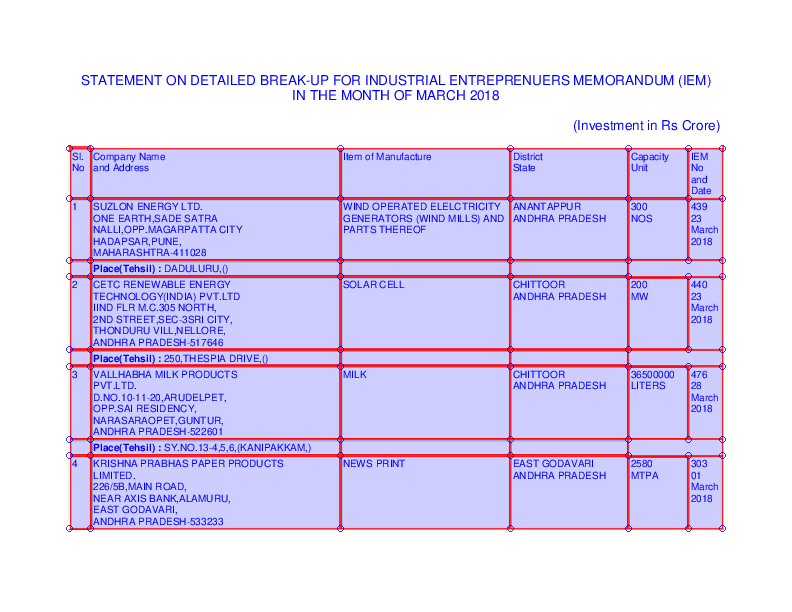

In [12]:
table_settings = {
    #"vertical_strategy": "explicit",
    "vertical_strategy": "lines",
    #"vertical_strategy": "text",
    #"horizontal_strategy": "explicit",
    "horizontal_strategy": "lines",
    #"horizontal_strategy": "text",
    #"explicit_vertical_lines": vertical_lines,
    #"explicit_horizontal_lines": horizontal_lines,
    "snap_x_tolerance": 3,
    "snap_y_tolerance": 3,
    "text_keep_blank_chars": True,
    #"min_words_vertical": 5,
    "min_words_horizontal": 1,
    #"text_x_tolerance": 3,
    #"text_y_tolerance": 3,
}

img.reset().debug_tablefinder(table_settings)

In [13]:
table=pdfpage.extract_tables(table_settings)

In [14]:
table[0][-10:]

[['Sl. \nNo ',
  'Company Name  \nand Address ',
  'Item of Manufacture ',
  'District \nState ',
  'Capacity \nUnit ',
  'IEM \nNo  \nand \nDate '],
 ['1 ',
  'SUZLON ENERGY LTD. \nONE EARTH,SADE SATRA \nNALLI,OPP.MAGARPATTA CITY \nHADAPSAR,PUNE, \nMAHARASHTRA-411028 ',
  'WIND OPERATED ELELCTRICITY \nGENERATORS (WIND MILLS) AND \nPARTS THEREOF ',
  'ANANTAPPUR  \nANDHRA PRADESH ',
  '300 \nNOS ',
  '439 \n23 \nMarch \n2018 '],
 ['  ', 'Place(Tehsil) : DADULURU,()  ', '  ', '  ', '   ', None],
 ['2 ',
  'CETC RENEWABLE ENERGY \nTECHNOLOGY(INDIA) PVT.LTD \nIIND FLR M.C.305 NORTH, \n2ND STREET,SEC-3SRI CITY, \nTHONDURU VILL,NELLORE, \nANDHRA PRADESH-517646 ',
  'SOLAR CELL ',
  'CHITTOOR  \nANDHRA PRADESH ',
  '200 \nMW ',
  '440 \n23 \nMarch \n2018 '],
 ['  ', 'Place(Tehsil) : 250,THESPIA DRIVE,()  ', '  ', '  ', '   ', None],
 ['3 ',
  'VALLHABHA MILK PRODUCTS \nPVT.LTD. \nD.NO.10-11-20,ARUDELPET, \nOPP.SAI RESIDENCY, \nNARASARAOPET,GUNTUR, \nANDHRA PRADESH-522601 ',
  'MILK ',
  'CHI

In [104]:
len(table[0][10][0])
table[0][10][0]

'    ONE EARTH,SADE SATRA                               ANDHRA PRADESH                       BINE GENERATOR            SETS       02/12/2015'

In [103]:
table[0][0:232]

[["                                        LIST OF INDUSTRIAL ENTREPRENEURS' MEMORANDUM (IEM)"],
 ['                                             Filed From : 01/12/2015 to : 31/12/2015'],
 [''],
 ['STATE : ANDHRA PRADESH'],
 ['-------------------------------------------------------------------------------------------------------------------------------------------'],
 ['S.No Name of Undertaking/                               Location                  Item of Manufacture                  Proposed  Ack.'],
 ['    Address                                                                                                             Annual  No./'],
 ['                                                                                                                      Capacity  Date'],
 ['-------------------------------------------------------------------------------------------------------------------------------------------'],
 ['  1 SUZLON ENERGY LTD,                                 ANANTAPP

In [111]:
# Cretar tables from all pages from words
#################################################

def create_tables():

    tables = []

    #for i in range(0,number_of_pages): # exclude last page -attention
    for i in range(0, number_of_pages): # exclude last page -attention

        print('pag_{}'.format(i+1))
        #Extrair palavras da pagina 1
        words = pdf.pages[i].extract_words(y_tolerance=2)
        df_words = pd.DataFrame(words)


        vertical_lines = verticallines(df_words)



        table_settings = {
            "vertical_strategy": "explicit",
            #"vertical_strategy": "lines",
            #"vertical_strategy": "text",
            #"horizontal_strategy": "explicit",
            #"horizontal_strategy": "lines",
            "horizontal_strategy": "text",
            "explicit_vertical_lines": vertical_lines,
            #"explicit_horizontal_lines": horizontal_lines,
            "snap_x_tolerance": 3,
            "snap_y_tolerance": 3,
            "text_keep_blank_chars": True,
            #"min_words_vertical": 5,
            #"min_words_horizontal": 1,
            #"text_x_tolerance": 3,
            #"text_y_tolerance": 3,
        }        



        table=pdf.pages[i].extract_tables(table_settings)    

        tables = tables + table[0]
    
    return tables


In [112]:
tables = create_tables()

pag_1
pag_2
pag_3
pag_4
pag_5
pag_6
pag_7
pag_8
pag_9
pag_10
pag_11
pag_12
pag_13
pag_14
pag_15
pag_16
pag_17
pag_18
pag_19
pag_20
pag_21
pag_22
pag_23
pag_24
pag_25
pag_26


In [178]:
tables[50:155]

[[''],
 ['  5 INOGENT LABORATORIES PVT                           VISAKHAPATNAM                  TRAMADOL HCL                     10.000  1795'],
 ['    LTD, UNIT II,                                      ANDHRA PRADESH                                                 MT         08/12/2015'],
 ['    PLOT #28A IDA NACHARAM,'],
 ['    ROAD NO 15,NACHARAM,'],
 ['    HYDERABAD,RANGA REDDY,'],
 ['    TELANGANA-500076'],
 ['    NU'],
 [''],
 ['     Telephone              Fax'],
 ['LOCATION PLOT NO.94,SY.JN                   TEHSIL LEMARTHI VILLAGE,'],
 [''],
 ['  6 SURYA ROSHNI LIMITED.,                             ANANTAPPUR                     GALVANIZED AND BLACK STEE    120000.000  1819'],
 ['    PADMA TOWER-1,                                     ANDHRA PRADESH                       L PIPE                    MT         09/12/2015'],
 ['    RAJENDRA PLACE,'],
 ['    NEW DELHI-110008'],
 ['    NU'],
 [''],
 ['     Telephone              Fax'],
 ['LOCATION GOLLAPURAM,                        TE

In [142]:
tables[-20:]

[['    OFF ANDHERI-KURLA ROAD,'],
 ['    ANDHERI (EAST), MUMBAI,'],
 ['    MAHARASHTRA-400059'],
 ['    NA'],
 [''],
 ['     Telephone              Fax'],
 ['LOCATION PLOT NO.A3-A6,                     TEHSIL AREA, SALCETTE'],
 [''],
 ['  4 WATSON PHARMA PVT. LTD.,                           GOA                            IORCASERIN HYDROCHLORIDE          0.000  1877'],
 ['    21-22, KALPATARU SQUARE,                           GOA                                  EXTENDED RELEASE TABLETS, MILLIONS   22/12/2015'],
 ['    KONDIVITA LANE,                                                              20 MG'],
 ['    OFF ANDHERI-KURLA ROAD,'],
 ['    ANDHERI (EAST), MUMBAI,'],
 ['    MAHARASHTRA-400059'],
 ['    NA'],
 [''],
 ['     Telephone              Fax'],
 ['LOCATION PLOT NO.A3-A6,PHASE                TEHSIL AREA,VERNA,SALCETTE'],
 [''],
 ['    NA : MANUFACTURE OF NEW ARTICLE,  NU : ESTABLISHMENT OF A NEW UNDERTAKING,  SE : EFFECTING SUBSTANTIAL EXPANSION']]

# Clean tables 

In [143]:
string = 'LOCATION NEAR BOYAPALEM VILL-               TEHSIL EDLAPADU MANDAL'

In [145]:
if 'TEHSIL' in string:
    print('Yes')

Yes


In [155]:
len(tables)
for row in tables:
    print('row:', row)


row: ["                                        LIST OF INDUSTRIAL ENTREPRENEURS' MEMORANDUM (IEM)"]
row: ['                                             Filed From : 01/12/2015 to : 31/12/2015']
row: ['']
row: ['STATE : ANDHRA PRADESH']
row: ['-------------------------------------------------------------------------------------------------------------------------------------------']
row: ['S.No Name of Undertaking/                               Location                  Item of Manufacture                  Proposed  Ack.']
row: ['    Address                                                                                                             Annual  No./']
row: ['                                                                                                                      Capacity  Date']
row: ['-------------------------------------------------------------------------------------------------------------------------------------------']
row: ['  1 SUZLON ENERGY LTD,          

In [190]:
#tabl = [y for x in table if x is not None]

#
#col = ['Name of Undertaking/Address', 'Location', 'Item of Manufacture/', 'Annual No./Capacity', 'Proposed Ack.', 'Date', 
#'NA/NU/SE', 'TEHSIL']


def tab_from_words():

    tab = []
    address, location, item, capacity, proposed, date, na_nu_se, tehsil = '', '', '', '', '', '', '', ''
    line = ''
    flag = 0
    
    for row in tables:
        #print('row=', row)
        if row[0] != '':
            #print('row=', row[0])
            if 'TEHSIL' in row[0]:
                #print('Yes')
                tehsil = row[0].split('TEHSIL')[1].strip()
                tab.append([address.strip(), location.strip(), item.strip(), capacity.strip(), proposed, date, na_nu_se, tehsil])
                address, location, item, capacity, proposed, date, na_nu_se, tehsil = '', '', '', '', '', '', '', ''

                flag = 0

            if row[0].split()[0].strip() == 'NA' or row[0].split()[0].strip() == 'NU' or row[0].split()[0].strip() == 'SE':
                    na_nu_se = row[0].split()[0].strip()
                    flag = 3

            if flag == 2 and row[0].split()[0].strip() != 'NA' and row[0].split()[0].strip() != 'NU' and row[0].split()[0].strip() != 'SE': 
                if len(row[0]) < 55:
                    address += row[0][4:55].strip() + '\n'
                    continue
                if len(row[0]) < 82:
                    address += row[0][4:55].strip() + '\n'
                    location += row[0][55:81].strip() + '\n'
                    continue
                if len(row[0]) < 118:
                    address += row[0][4:55].strip() + '\n'
                    location += row[0][55:81].strip() + '\n'               
                    item += row[0][81:118].strip() + '\n'
                    continue       

            if flag == 1 and '/' in row[0].split()[-1]:
                address += row[0][4:55].strip() + '\n'
                location += row[0][55:81].strip() + '\n'
                item += row[0][81:118].strip() + '\n'
                capacity += row[0][118:125].strip()
                date = row[0][129:].strip()
                flag = 2


            if row[0].split()[0].isnumeric() and row[0].split()[-1].isnumeric():
                flag = 1
                address = row[0][4:55].strip() + '\n'
                location = row[0][55:81].strip() + '\n'
                item = row[0][81:114].strip() + '\n'
                capacity = row[0][114:125].strip() + ' '
                proposed = row[0][125:].strip()                    
                    

    return tab

In [191]:
tab = tab_from_words()
tab[:100]

[['SUZLON ENERGY LTD,\nONE EARTH,SADE SATRA\nNALLI,OPP.MAGARPATTA CITY\nHADAPSAR, PUNE\nMAHARASHTRA-411028',
  'ANANTAPPUR\nANDHRA PRADESH',
  'ROTOR BLADES FOR WIND TUR\nBINE GENERATOR',
  '400.000 SETS',
  '1757',
  '02/12/2015',
  'NU',
  'IPPERU,MANDAL KUDERU'],
 ['GOUTHAM BUDDHA TEXTILE PARK\nPVT. LTD,\nNO.FF-1,BHAVYA,RESIDENCY,\nDOOR NO.3-29-29, 2ND LINE\nKRISHNA NAGAR,GUNTUR,\nANDHRA PRADESH-522006',
  'GUNTUR\nANDHRA PRADESH',
  'PREPARATION AND SPINNING\nOF COTTON FIBER INCLUDING\nBLENDED COTTON',
  '150.000 LAKH KG',
  '1770',
  '03/12/2015',
  'NU',
  'EDLAPADU MANDAL'],
 ['GYP ELITE INDIA PVT LTD\n26-4-11,VIKRAM NAGAR,\nNEAR AYYAPPA TEMPLE,\nKONDAMAREDDY,NELLORE,\nNELLORE,\nANDHRA PRADESH-524004',
  'NELLORE\nANDHRA PRADESH',
  'GYPSUM PLASTER',
  '15000.000 MT',
  '1774',
  '03/12/2015',
  'NU',
  'SARVEPALLI POST'],
 ['HBL POWER SYSTEMS LIMITED,\n8-2-601, ROAD NO.10\nBANJARA HILLS,\nHYDERABAD,\nTELANGANA-500034',
  'GUNTUR\nANDHRA PRADESH',
  'SPUN CONCRETE PRODUCTS IN\nC

In [192]:
tab[-3:]

[['TATA CONSULTANCY SERVICES LTD,\nPLOT NOS.17B,5A,5B & 5C,\nTIVIM INDUSTRIAL ESTATE,\nKARASWADA MAPUSA,\nNORTH GOA,\nGOA-403526',
  'NORTH GOA\nGOA',
  'MANUFACTURE OF LABORATORY\nAPPARATUS',
  '3000.000 NOS',
  '1755',
  '02/12/2015',
  'NA',
  'ESTATE,MAPUSA'],
 ['WATSON PHARMA PVT LTD.,\n21-22,KALPATARU SQUARE,\nKONDIVITA LANE,\nOFF ANDHERI-KURLA ROAD,\nANDHERI (EAST), MUMBAI,\nMAHARASHTRA-400059',
  'GOA\nGOA',
  'POTASSIUM CITRATE EXTENDE\nD RELEASE TABLETS 15 MEQ,\n10 MEQ & 5 MEQ',
  '0.000 MILLION',
  '1814',
  '09/12/2015',
  'NA',
  'AREA, SALCETTE'],
 ['WATSON PHARMA PVT. LTD.,\n21-22, KALPATARU SQUARE,\nKONDIVITA LANE,\nOFF ANDHERI-KURLA ROAD,\nANDHERI (EAST), MUMBAI,\nMAHARASHTRA-400059',
  'GOA\nGOA',
  'IORCASERIN HYDROCHLORIDE\nEXTENDED RELEASE TABLETS,\n20 MG',
  '0.000 MILLION',
  '1877',
  '22/12/2015',
  'NA',
  'AREA,VERNA,SALCETTE']]

In [193]:
len(tab)

165

In [194]:

col = ['Name of Undertaking/Address', 'Location', 'Item of Manufacture/', 'Annual No./Capacity', 'Proposed Ack.', 'Date', 'NA/NU/SE', 'TEHSIL']


# 4 - Convert to Pandas DataFrame

In [195]:
df = pd.DataFrame(tab,columns= col)
df[:5]

,Name of Undertaking/Address,Location,Item of Manufacture/,Annual No./Capacity,Proposed Ack.,Date,NA/NU/SE,TEHSIL
0,"SUZLON ENERGY LTD,\nONE EARTH,SADE SATRA\nNALL...",ANANTAPPUR\nANDHRA PRADESH,ROTOR BLADES FOR WIND TUR\nBINE GENERATOR,400.000 SETS,1757,02/12/2015,NU,"IPPERU,MANDAL KUDERU"
1,"GOUTHAM BUDDHA TEXTILE PARK\nPVT. LTD,\nNO.FF-...",GUNTUR\nANDHRA PRADESH,PREPARATION AND SPINNING\nOF COTTON FIBER INCL...,150.000 LAKH KG,1770,03/12/2015,NU,EDLAPADU MANDAL
2,"GYP ELITE INDIA PVT LTD\n26-4-11,VIKRAM NAGAR,...",NELLORE\nANDHRA PRADESH,GYPSUM PLASTER,15000.000 MT,1774,03/12/2015,NU,SARVEPALLI POST
3,"HBL POWER SYSTEMS LIMITED,\n8-2-601, ROAD NO.1...",GUNTUR\nANDHRA PRADESH,SPUN CONCRETE PRODUCTS IN\nCLUDING PILES AND P...,30000.000 NOS,1784,04/12/2015,NU,KANAPARRU VILLAGE
4,"INOGENT LABORATORIES PVT\nLTD, UNIT II,\nPLOT ...",VISAKHAPATNAM\nANDHRA PRADESH,TRAMADOL HCL,10.000 MT,1795,08/12/2015,NU,"LEMARTHI VILLAGE,"


In [196]:
df.head(5)

,Name of Undertaking/Address,Location,Item of Manufacture/,Annual No./Capacity,Proposed Ack.,Date,NA/NU/SE,TEHSIL
0,"SUZLON ENERGY LTD,\nONE EARTH,SADE SATRA\nNALL...",ANANTAPPUR\nANDHRA PRADESH,ROTOR BLADES FOR WIND TUR\nBINE GENERATOR,400.000 SETS,1757,02/12/2015,NU,"IPPERU,MANDAL KUDERU"
1,"GOUTHAM BUDDHA TEXTILE PARK\nPVT. LTD,\nNO.FF-...",GUNTUR\nANDHRA PRADESH,PREPARATION AND SPINNING\nOF COTTON FIBER INCL...,150.000 LAKH KG,1770,03/12/2015,NU,EDLAPADU MANDAL
2,"GYP ELITE INDIA PVT LTD\n26-4-11,VIKRAM NAGAR,...",NELLORE\nANDHRA PRADESH,GYPSUM PLASTER,15000.000 MT,1774,03/12/2015,NU,SARVEPALLI POST
3,"HBL POWER SYSTEMS LIMITED,\n8-2-601, ROAD NO.1...",GUNTUR\nANDHRA PRADESH,SPUN CONCRETE PRODUCTS IN\nCLUDING PILES AND P...,30000.000 NOS,1784,04/12/2015,NU,KANAPARRU VILLAGE
4,"INOGENT LABORATORIES PVT\nLTD, UNIT II,\nPLOT ...",VISAKHAPATNAM\nANDHRA PRADESH,TRAMADOL HCL,10.000 MT,1795,08/12/2015,NU,"LEMARTHI VILLAGE,"


In [186]:
df_old = df
df.tail()

,Name of Undertaking/Address,Location,Item of Manufacture/,Annual No./Capacity,Proposed Ack.,Date,NA/NU/SE,TEHSIL
160,"DESIGN INDIA\nB-96/1,\nNARAINA INDUSTRIAL AREA...",DELHI\nDELHI,"PRINTED BOOKS, EXERCISE B\nOOKS, NOTE BOOKS, C...",20000.000 REAMS,1816,09/12/2015,NU,PHASE-1
161,"TATA CONSULTANCY SERVICES LIMITED.,\nPLOT NOS....",NORTH GOA\nGOA,"MANUFACTURE OF VIRTUAL RE\nALITY HELMETS,COMPU...",200000.000 NOS,1749,01/12/2015,NA,"ESTATE, MAPUSA"
162,"TATA CONSULTANCY SERVICES LTD,\nPLOT NOS.17B,5...",NORTH GOA\nGOA,MANUFACTURE OF LABORATORY\nAPPARATUS,3000.000 NOS,1755,02/12/2015,NA,"ESTATE,MAPUSA"
163,"WATSON PHARMA PVT LTD.,\n21-22,KALPATARU SQUAR...",GOA\nGOA,POTASSIUM CITRATE EXTENDE\nD RELEASE TABLETS 1...,0.000 MILLION,1814,09/12/2015,NA,"AREA, SALCETTE"
164,"WATSON PHARMA PVT. LTD.,\n21-22, KALPATARU SQU...",GOA\nGOA,IORCASERIN HYDROCHLORIDE\nEXTENDED RELEASE TAB...,0.000 MILLION,1877,22/12/2015,NA,"AREA,VERNA,SALCETTE"


In [187]:
df.shape

(165, 8)

In [188]:
df.dtypes

Name of Undertaking/Address    object
Location                       object
Item of Manufacture/           object
Annual No./Capacity            object
Proposed Ack.                  object
Date                           object
NA/NU/SE                       object
TEHSIL                         object
dtype: object

In [863]:
# replace empty cell by NaN

#df = df.mask(df == '')

In [ ]:
# replace NaN by string 'N/A'
df.fillna('N/A', inplace=True)

In [ ]:
#Remove duplicates
df2 = df.drop_duplicates()

In [708]:
#remove rows where cell 'DESCRIPTION_21_2' in columns are NaN 

#df.dropna(subset = ['DESCRIPTION_21_2'], inplace = True)

In [201]:
# col = ['ORDER Nº', 'PRODUCT DESCRIPTION',  'PRICE PER UNIT (€)*']

# There is no cleanup necessary

# https://pbpython.com/currency-cleanup.html        
# Cleaning Up Currency Data with Pandas
#df['Price'] = df['Price'].apply(lambda x: x.replace('$', '').replace(',', '')
#                                if isinstance(x, str) else x).astype(float)

#df_2021_1['REGULAR\nHOURS_21_1'] = df_2021_1['REGULAR\nHOURS_21_1'].apply(lambda x: x.replace('M', '') if isinstance(x, str) else x).astype(float)

#df[['Act Hours', 'Act Material', 'Act Labor', 'Act Overhead', 'Total Cost']] = df[[ \
#           'Act Hours', 'Act Material', 'Act Labor', 'Act Overhead', 'Total Cost']].replace(',', '').astype(float)

#df[['Act Hours', 'Act Material', 'Act Labor', 'Act Overhead', 'Total Cost']] = df[['Act Hours', 'Act Material', 'Act Labor', 'Act Overhead', 'Total Cost']].apply(lambda x: x.replace(',', '') 
#                                                                                   if isinstance(x, str) else x).astype(float)

# convert to float or int
#df = df.astype({'Ship Qty':int})
df = df.astype({'Amount':float})

# Convert Percentage String to Numeric
# df['Pass_rate'] = df['Pass_rate'].str.rstrip("%").astype(float)/100

# convert "BillNo" from float to int and replace NaN values
#df['BillNo'] = df['BillNo'].fillna(0).astype(int)

# convert the 'Date' column to datetime format
df['Time']= pd.to_datetime(df['Time'])

In [202]:
df.dtypes

UPC code        object
Order Qty       object
Shipped         object
B/O             object
Unit            object
Description     object
Rate           float64
Amount         float64
dtype: object

In [203]:
df.head()

,UPC code,Order Qty,Shipped,B/O,Unit,Description,Rate,Amount
0,900-NRG-SP10/15,1,0,0,BX,Self Seal Sterilization Pouches 10X15 Box/200,29.99,29.99
1,900-NRG-AIM,1,0,0,BX,Alginate Fast Set Dust-Free Chromatic Mint 1Lb,14.84,14.84
2,825-SCI-OPT1-W12,10,0,0,Can,Optim 1 One-Step Cleaner Disenfectant Wipes 6“...,11.99,119.90
3,209-DHP-31S,2,0,0,,Dri-Angle Plain Small Bx/400,11.99,23.98
4,485-SPT-99210,2,0,0,BX,"OraVerse, Phentolamine Mesylate 1.7ml Cartridg...",66.99,133.98


In [204]:
#df_group = df_2021_1.groupby(by = ['NAME', 'DESCRIPTION_21_1']).sum()
#df_group_2021_1 = df_2021_1.groupby(by = ['NAME']).sum()
#df_group_2021_1

In [205]:
#df_bonus_2021_1 = df_2021_1[df_2021_1['DESCRIPTION_21_1'] == 'Bonus']

#df_bonus_2021_1_group = df_bonus_2021_1.groupby('NAME').sum()

#df_bonus_2021_1_group = df_bonus_2021_1_group['REGULAR\AMOUNT_21_1']

#df_bonus_2021_1 = pd.DataFrame(columns = ['BONUS_21_1'])

#df_bonus_2021_1['BONUS_21_1'] = df_bonus_2021_1_group.to_frame()

#df_bonus_2021_1

In [138]:
#df_group_2020 = df_2020.set_index('NAME')

In [140]:
#df_group.index
#df_group.loc['Cox,DrBrandiL', 'Holiday']

In [206]:
#Concat Dataframe avoid repetition index (add diferent columns for the same index )

#df_compare = pd.concat([df_group_2021_1, df_group_2021_2], axis=1, join='outer')
#df_compare[:5]

# 5 - Export DataFrame to EXCEL and CSV

In [197]:
# Export to Excel file
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html

# Export to csv file
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

path = '/Users/rocha/OneDrive/Documentos/Python_Scripts/Convert_PDF/Data'
os.makedirs(path + '/Output', exist_ok=True) 


#df.to_excel(path + '\Output\Castle_Hills.xlsx', sheet_name='Sheet_name_1', index=False) 
#df.to_csv(path + '\Output\Castle_Hills.csv', index=False)

df.to_excel(path + '/Output/upwork_2023_06_06.xlsx', sheet_name='Sheet_name_1', index=False) 
#Writing to Excel with MultiIndex columns and no index
#df.to_excel(path + '/Output/upwork_2022_10_04.xlsx', sheet_name='Sheet_name_1', index=True)


#df.to_csv(path + '/Output/apwork_2022_04_27.csv', index=False)

# 6 - Export DataFrame to EXCEL (Several Sheets) 

https://www.geeksforgeeks.org/how-to-write-pandas-dataframes-to-multiple-excel-sheets/

In [82]:
path = '/Users/rocha/OneDrive/Documentos/Python_Scripts/Convert_PDF'
os.makedirs(path + '\Output', exist_ok=True) 

# create a excel writer object
with pd.ExcelWriter(path + '\Output\job_order.xlsx') as writer:
   
    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    df.to_excel(writer, sheet_name="sheet1", index=False)
    #df.to_excel(writer, sheet_name="Vegetables", index=False)

    # Get the xlsxwriter workbook and worksheet objects.
    workbook  = writer.book
    worksheet = writer.sheets['sheet1']

    # Add some cell formats.
    format1 = workbook.add_format({'num_format': '£#,##0.00'})
    # Set the column width and format.
    worksheet.set_column('G:G', 18, format1)

In [83]:
# Or

# create a excel writer object as shown using
# Excelwriter function
with pd.ExcelWriter(path + '\Output\job_order.xlsx', mode="a", engine="openpyxl") as writer:
     
    # use to_excel function and specify the sheet_name and index to
    # store the dataframe in specified sheet
    df.to_excel(writer, sheet_name="Cool drinks")

# Reading Google Sheet

In [ ]:
#https://towardsdatascience.com/read-data-from-google-sheets-into-pandas-without-the-google-sheets-api-5c468536550

sheet_url = "https://docs.google.com/spreadsheets/d/1CHI_2ObDRM7mLcN_K6y1hZOwrQ-QLgW4YYzFalcH2PQ/edit#gid=0"

url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [ ]:
#df = pd.read_csv(url_1, header = [0])
df = pd.read_csv(url_1, header = [1])

#df.columns = df.iloc[0] 

#df = df[1:]

In [ ]:
df

# How to convert an Excel file to Google Sheets by importing its data

https://blog.coupler.io/convert-excel-to-google-sheets/

# 6 - Export DataFrame to JSON

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_json.html

In [12]:
import pandas as pd
import json

df = pd.DataFrame(
    [["a", "b", "c", "d"], ["e", "f", "g", "h"]],
    index=["row 1", "row 2"],
    columns=["col 1", "col 2", "col 3", "col 4"],
)


In [13]:
df

,col 1,col 2,col 3,col 4
row 1,a,b,c,d
row 2,e,f,g,h


In [17]:

result = df.to_json(orient="records")

#Python JSON to List
parsed = json.loads(result)

#Convert Python List to JSON
json.dumps(parsed, indent=4)

'[\n    {\n        "col 1": "a",\n        "col 2": "b",\n        "col 3": "c",\n        "col 4": "d"\n    },\n    {\n        "col 1": "e",\n        "col 2": "f",\n        "col 3": "g",\n        "col 4": "h"\n    }\n]'

In [22]:
result

'[{"col 1":"a","col 2":"b","col 3":"c","col 4":"d"},{"col 1":"e","col 2":"f","col 3":"g","col 4":"h"}]'

In [23]:
parsed

[{'col 1': 'a', 'col 2': 'b', 'col 3': 'c', 'col 4': 'd'},
 {'col 1': 'e', 'col 2': 'f', 'col 3': 'g', 'col 4': 'h'}]

In [24]:
json.dumps(parsed, indent=4)

'[\n    {\n        "col 1": "a",\n        "col 2": "b",\n        "col 3": "c",\n        "col 4": "d"\n    },\n    {\n        "col 1": "e",\n        "col 2": "f",\n        "col 3": "g",\n        "col 4": "h"\n    }\n]'

In [20]:
# convert Json to Dataframe
df_1 = pd.read_json(json.dumps(parsed, indent=4))

In [21]:
df_1

,col 1,col 2,col 3,col 4
0,a,b,c,d
1,e,f,g,h


In [ ]:
# How to convert JSON into a Pandas DataFrame
# Reading simple JSON from a local file
#https://towardsdatascience.com/how-to-convert-json-into-a-pandas-dataframe-100b2ae1e0d8
    
df2 = pd.read_json('data/simple.json')

# 7 - Export DataFrame to SQL

In [25]:
import pandas as pd

data = {'product_name': ['Computer','Tablet','Monitor','Printer'],
        'price': [900,300,450,150]
        }

df = pd.DataFrame(data, columns= ['product_name','price'])
print (df)

  product_name  price
0     Computer    900
1       Tablet    300
2      Monitor    450
3      Printer    150


In [26]:
import sqlite3

In [49]:
conn = sqlite3.connect('test_database')
c = conn.cursor()

In [50]:
c.execute('CREATE TABLE IF NOT EXISTS products (product_name text, price number)')
conn.commit()

In [51]:
#Step 2: Get from Pandas DataFrame to SQL

df.to_sql('products', conn, if_exists='replace', index = False)

4

In [52]:
# step 3: Get from SQL

c.execute('''  
SELECT * FROM products
          ''')

for row in c.fetchall():
    print (row)

('Computer', 900)
('Tablet', 300)
('Monitor', 450)
('Printer', 150)


In [53]:
c.execute('''  
		SELECT * FROM products
		WHERE price = (SELECT max(price) FROM products)
          ''')

In [54]:
df_sql = pd.DataFrame(c.fetchall(), columns=['product_name','price'])    
print (df_sql)

  product_name  price
0     Computer    900


In [55]:
# Close connectio
conn.close()

In [47]:
# Read from SQL
conn = sqlite3.connect('test_database')

pd.read_sql('SELECT * FROM products', conn)

,product_name,price
0,Computer,900
1,Tablet,300
2,Monitor,450
3,Printer,150


In [48]:
conn.close()

# Convert Excel file into database table in Python

In [1]:
import pandas as pd
import sqlite3

In [4]:
path = r'C:\Users\rocha\OneDrive\Documentos\Python_Scripts\Google_Scraping\Uscities'

In [41]:
# Step No 1: Convert Excel file into Dataframe

df = pd.read_excel(r'C:\Users\pbarbosa\OneDrive\Documentos\Python_Scripts\Google_Scraping\Uscities\uscities.xlsx')
df.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18680025,10768.0,shape,False,True,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,12531334,3267.0,shape,False,True,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8586888,4576.0,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,6076316,4945.0,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7935,-96.7667,5910669,1522.0,shape,False,True,America/Chicago,1,75098 75287 75230 75231 75236 75237 75235 7525...,1840019440


In [42]:
dfs.shape

(30409, 17)

In [43]:
# Step No 2: Convert Dataframe to SQL database

db = sqlite3.connect(path + r'\sqlite.db')

# Create Table Uscities and cop ythe dataframe to it
df.to_sql('Uscities', db)
print(f'{df} inserted successfully')

               city    city_ascii state_id    state_name  county_fips  \
0          New York      New York       NY      New York        36081   
1       Los Angeles   Los Angeles       CA    California         6037   
2           Chicago       Chicago       IL      Illinois        17031   
3             Miami         Miami       FL       Florida        12086   
4            Dallas        Dallas       TX         Texas        48113   
...             ...           ...      ...           ...          ...   
30404      Drummond      Drummond       ID         Idaho        16043   
30405  Lost Springs  Lost Springs       WY       Wyoming        56009   
30406         Provo         Provo       SD  South Dakota        46047   
30407     Goldcreek     Goldcreek       MT       Montana        30077   
30408        Le Roy        Le Roy       IA          Iowa        19053   

       county_name      lat       lng  population  density source  military  \
0           Queens  40.6943  -73.9249    186

In [44]:
db.close()

In [46]:
# Read from SQL
conn = sqlite3.connect(path + r'\sqlite.db')

pd.read_sql('SELECT * FROM Uscities', conn)

,index,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18680025,10768.0,shape,0,1,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016
1,1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,12531334,3267.0,shape,0,1,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491
2,2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8586888,4576.0,shape,0,1,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,6076316,4945.0,shape,0,1,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7935,-96.7667,5910669,1522.0,shape,0,1,America/Chicago,1,75098 75287 75230 75231 75236 75237 75235 7525...,1840019440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30404,30404,Drummond,Drummond,ID,Idaho,16043,Fremont,43.9996,-111.3433,1,16.4,shape,0,1,America/Boise,3,83420,1840018609
30405,30405,Lost Springs,Lost Springs,WY,Wyoming,56009,Converse,42.7652,-104.9255,1,3.2,shape,0,1,America/Denver,3,82224 82229,1840021288
30406,30406,Provo,Provo,SD,South Dakota,46047,Fall River,43.1937,-103.8329,1,3.1,shape,0,0,America/Denver,3,57735,1840035958
30407,30407,Goldcreek,Goldcreek,MT,Montana,30077,Powell,46.5838,-112.9284,1,1.9,shape,0,0,America/Denver,3,59733,1840032724


In [136]:
# Read from SQL
conn = sqlite3.connect(path + r'\sqlite.db')

df_uscities = pd.read_sql('SELECT city, state_id, lat, lng FROM Uscities', conn)

In [137]:
df_uscities[:5]

,city,state_id,lat,lng
0,New York,NY,40.6943,-73.9249
1,Los Angeles,CA,34.1141,-118.4068
2,Chicago,IL,41.8375,-87.6866
3,Miami,FL,25.7840,-80.2101
4,Dallas,TX,32.7935,-96.7667


In [55]:
df_uscities.set_index('city', inplace = True)

In [56]:
df_uscities

,state_id,lat,lng
city,,,
New York,NY,40.6943,-73.9249
Los Angeles,CA,34.1141,-118.4068
Chicago,IL,41.8375,-87.6866
Miami,FL,25.7840,-80.2101
Dallas,TX,32.7935,-96.7667
...,...,...,...
Drummond,ID,43.9996,-111.3433
Lost Springs,WY,42.7652,-104.9255
Provo,SD,43.1937,-103.8329


In [82]:
# df_uscities.reset_index(inplace = True)
df_uscities.loc['Tuscaloosa'].to_list()
#df_uscities.loc[df_uscities.index.str.contains('tuscaloosa', case = False)]
#df_uscities.loc['Tuscaloosa']

['AL', 33.2348, -87.5268]

In [44]:
df_uscities.index

Index(['New York', 'Los Angeles', 'Chicago', 'Miami', 'Dallas', 'Houston',
       'Philadelphia', 'Atlanta', 'Washington', 'Boston',
       ...
       'Bettles', 'Cedar Point', 'Valley-Hi', 'Penalosa', 'Cottonwood',
       'Drummond', 'Lost Springs', 'Provo', 'Goldcreek', 'Le Roy'],
      dtype='object', name='city', length=30409)

In [45]:
df_uscities.reset_index(inplace = True)

In [138]:
cur = conn.cursor()

cities = ['Los Angeles', 'Tuscaloosa', 'Miami']
#cities = 'Tuscaloosa'
#for town in cities:

cur.execute(f"SELECT city, state_id, lat, lng FROM Uscities WHERE city IN ({','.join(['?']*len(cities))})", cities)
#cur.execute("SELECT city, state_id, lat, lng FROM Uscities WHERE city IN  ('Los Angeles', 'Tuscaloosa', 'Miami')")
#cur.execute("SELECT city, state_id, lat, lng FROM Uscities WHERE city =?", ['tuscaloosa'])
rows = cur.fetchall()

#Closing the connection
conn.close()

for row in rows[:5]:
    print(row)

('Los Angeles', 'CA', 34.1141, -118.4068)
('Miami', 'FL', 25.784, -80.2101)
('Tuscaloosa', 'AL', 33.2348, -87.5268)
('Miami', 'OK', 36.8878, -94.8711)
('Miami', 'AZ', 33.3951, -110.8724)


In [139]:
rows

[('Los Angeles', 'CA', 34.1141, -118.4068),
 ('Miami', 'FL', 25.784, -80.2101),
 ('Tuscaloosa', 'AL', 33.2348, -87.5268),
 ('Miami', 'OK', 36.8878, -94.8711),
 ('Miami', 'AZ', 33.3951, -110.8724),
 ('Miami', 'TX', 35.6923, -100.6417),
 ('Los Angeles', 'TX', 26.4947, -97.7862),
 ('Miami', 'MO', 39.3224, -93.2258)]

In [47]:
# Print Tables

#Creating a cursor object using the cursor() method
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

print(cursor.fetchall())

[('PB_1',), ('Uscities',)]


In [167]:
#Doping PB_1 table if already exists

# Delete table
#cursor.execute("DROP TABLE PB_1")
#print("Table dropped... ")

# Clear all content of the table
cursor.execute('DELETE FROM items');
print("Table cleared... ")

#Commit your changes in the database
conn.commit()

Table cleared... 


In [168]:
# Close cursor
cursor.close()

#Closing the connection
conn.close()

In [166]:
import sqlite3

path = r'C:\Users\rocha\OneDrive\Documentos\Python_Scripts\Google_Scraping\Uscities'

conn = sqlite3.connect(path + r'\sqlite.db')
cursor = conn.cursor()

In [142]:

cursor.execute('''
    CREATE TABLE IF NOT EXISTS items (
    Id integer PRIMARY KEY,
    City text NOT NULL,
    State text,
    Text text,
    Rate real,
    Reviews integer,
    Price text,
    Address text,
    Url text,
    Phone text,
    Plus_Code text,
    Href text ) 
    ''')


#cursor.execute("DROP TABLE items")

#Commit your changes in the database
conn.commit()

# Close Cursor
cursor.close()

#Closing the connection
conn.close()

In [154]:
def insertMultipleRecords(recordList):
    
    path = r'C:\Users\rocha\OneDrive\Documentos\Python_Scripts\Google_Scraping\Uscities'
    
    try:
        conn = sqlite3.connect(path + r'\sqlite.db')
        cursor = conn.cursor()
        print("Connected to SQLite")

        sqlite_insert_query = """INSERT INTO items
                          (City, State, Text, Rate, Reviews, Price, Address, Url, Phone, Plus_Code, Href) 
                          VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);"""

        cursor.executemany(sqlite_insert_query, recordList)
        conn.commit()
        print("Total", cursor.rowcount, "Records inserted successfully into SqliteDb_developers table")
        conn.commit()
        cursor.close()

    except sqlite3.Error as error:
        print("Failed to insert multiple records into sqlite table", error)
    finally:
        if conn:
            conn.close()
            print("The SQLite connection is closed")

In [156]:
recordsToInsert = [['Feira', 'FR', 'ghfhg jhgjgjg', 5.3, 24, '€€€', 'gfgd hfhfhfh\n wqlklk jhkh', 'jos@gmail.com', '2019 01 14', '9500', 'https://www.nos.pt'],
                   ['Lavra', 'LV', 'ghfhg jhgjgjg', 5.3, 24, '€€€', 'gfgd hfhfhfh\n wqlklk jhkh', 'jos@gmail.com', '2019 01 14', '9500', 'https://www.nos.pt'],
                   ['Porto GR', 'PT', 'ghfhg jhgjgjg', 5.3, 24, '€€€', 'gfgd hfhfhfh\n wqlklk jhkh', 'jos@gmail.com', '2019 01 14', '9500', 'https://www.nos.pt']]

insertMultipleRecords(recordsToInsert)

Connected to SQLite
Total 3 Records inserted successfully into SqliteDb_developers table
The SQLite connection is closed


In [ ]:
#Commit your changes in the database
conn.commit()

#Closing the connection
conn.close()